In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# ***Scaled Page Rank***
----------

In [2]:
# How to interpret page ranks and identify the potential problems that it has and finding a solution.

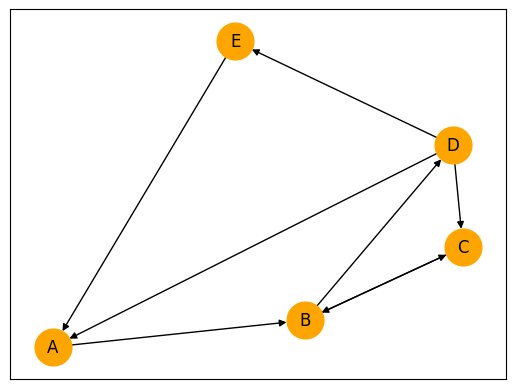

In [7]:
# Page rank value of a node after k steps can be interpreted as the probability of a random walker landing on that node after k number of steps.

graph = nx.MultiDiGraph()
graph.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("C", "B"), ("D", "C"), ("D", "A"), ("D", "E"), ("E", "A")])
positions = nx.spiral_layout(graph)
nx.draw_networkx(graph, node_color = "orange", node_size = 700, pos = positions)

In [8]:
# A random walk of k steps.
# First start at a random node.
# Choose an outgoing node at random.
# Move there.
# Repeat this until k steps.

# e.g a random walk of 5 steps

# Start at D
# D -> A (we have 3 choices to jump from node D here)
# A -> B (we have no choices here)
# B -> C (two options here)
# C -> B (no choices here, coming back)
# B -> D (no choices here either)     - 5th step.

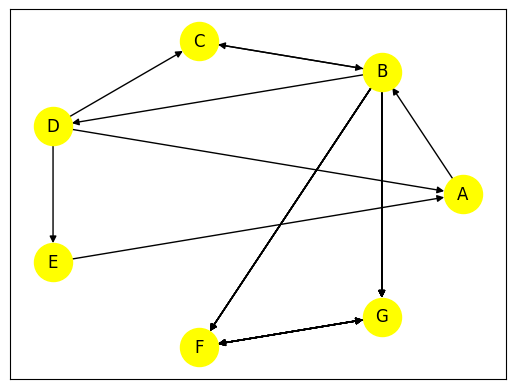

In [15]:
# Adding to nodes F & G

graph.add_edges_from([("B", "F"), ("B", "G"), ("F", "G"), ("G", "F")])
positions = nx.circular_layout(graph)
nx.draw_networkx(graph, node_color = "yellow", node_size = 750, pos = positions)

In [16]:
# Consider a random walk in this graph with an infinite k
# Which nodes will have the highest page ranks?

# Nodes F and G.
# Once you reach F or G there is no way to go out.
# It is a closed pair with no outgoing edges.
# One has to go back and forth inbetween F and G.
# Since k is large enough (assumed infinity), every one will eventually get stuck at F or G.

# The probability of landing on any nodes other than F or G is 0, since you are stuck between F and G.
# If this is a very short walk, then this will be very different case as long as you do not
# jump to F or G in your path.

In [18]:
# However this situation is problematic.
# Assuming that F and G are the only importatnt nodes in this graph while others have virtually 0 importance is irrational.
# This can be fixed by introducing a parameter called damping parameter alpha and changing the rules of the random walk a little.

In [19]:
# We again start at a random node
# We will then follow an outgoing edge at random - P(this event) = alpha
# Or we'll choose a completely random node and jump to it. (does not have to be a direct neighbour of the node where we are at) 
# P(this event) = 1 - alpha


In [20]:
# Compared to basic page rank method, here starting at a random node, we will move along an edge with probability alpha 
# (the event of moving to a random edge has the probability alpha) not the edge itself!
# Or jump to a completely random node with probability 1 - alpha.
# Repeat this k times.
# In this way, we won't get stuck anywhere since there is always a chance to jump to a completely random node.

In [21]:
# Scaled page rank of a node n with damping parameter alpha is the probability that this random walker with a damping parameter alpha lands
# on node n after k steps.
# Similar to the basic page rank, for most networks, as k gets larger one will eventually get stable scaled page ranks
# However these scaled page ranks are dependent on the alpha (damping parameter)

In [22]:
# Generally a damping parameter is chosen between 0.8 and 0.9
# Therefore, we will be following along outgoing edges most of the time.
# Sometimes (10 to 20%) we'll be jumping randomly, such that we are not stuck anywhere.
# In this way no node will get a page rank of 0

In [23]:
# Damping parameter works well with very very large networks, not appropriate for particularly small networks.

nx.pagerank(graph)

{'A': 0.05354494321750759,
 'B': 0.09587331856234811,
 'C': 0.03403649743716085,
 'D': 0.026521908709074896,
 'E': 0.028943160156657384,
 'F': 0.38054008595862543,
 'G': 0.38054008595862543}

In [29]:
nx.pagerank(graph, alpha = 0.8, max_iter = 100_000_000)

{'A': 0.06797204484108038,
 'B': 0.11787436191698246,
 'C': 0.04365598467538548,
 'D': 0.034465214799120694,
 'E': 0.037762198447693344,
 'F': 0.34913509765986894,
 'G': 0.34913509765986894}

In [30]:
nx.pagerank(graph, alpha = 0.0, max_iter = 100_000_000)

{'A': 0.14285714285714285,
 'B': 0.14285714285714285,
 'C': 0.14285714285714285,
 'D': 0.14285714285714285,
 'E': 0.14285714285714285,
 'F': 0.14285714285714285,
 'G': 0.14285714285714285}

In [33]:
# The basic page rank without a damping parameter
# Note that the page ranks of all nodes except F and G are virtually 0.

nx.pagerank(graph, alpha = 1, max_iter = 100_000_000)

{'A': 4.2912486154299897e-07,
 'B': 1.5891967851633186e-06,
 'C': 3.4613700853410663e-07,
 'D': 2.0488682013189707e-07,
 'E': 1.4125018840220954e-07,
 'F': 0.4999986447021682,
 'G': 0.4999986447021682}